## ISETBIO:  Scene

ISETBIO is structured around a few key objects. This script introduces the first and simplest ISETBIO object: a scene. The scene describes the radiance field.  For the present tutorial we  work with a simple planar radiance image, such as the image on a display surface.

**Key functions: **  sceneCreate, sceneGet, sceneSet, scenePlot.

**See the bottom of this notebook for more notes about creating scenes**

Additional examples of working with scenes [can be found here](http://imageval.com/wiki/doku.php?id=scenes_scripts).  Most (but maybe not all) of the examples there also work with ISETBIO.

In [1]:
% Initialize ISETBIOS
ieInit;

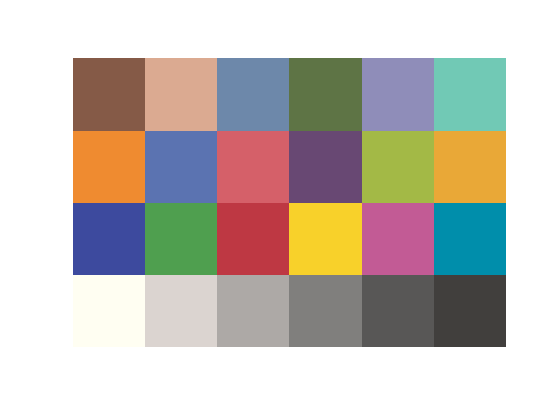

[Warning: MATLAB has disabled some advanced graphics rendering features by
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [2]:
% Create a simple scene of color patches
scene = sceneCreate('macbeth d65');
sceneShowImage(scene);


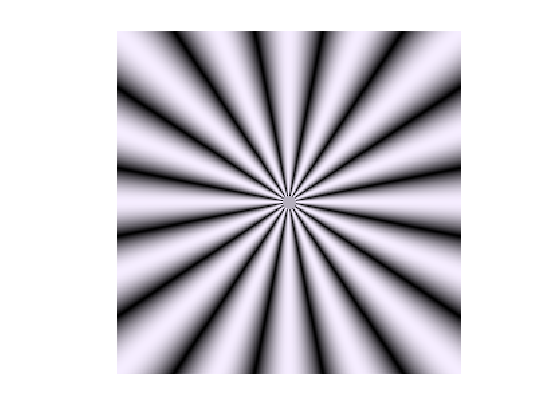

In [3]:
% There are many different types of simple scenes available
scene = sceneCreate('rings rays');
sceneShowImage(scene);

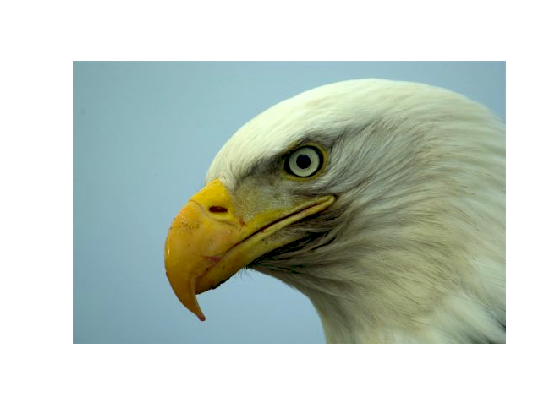

[vcReadImage] Assuming 8bit image and 10 bit LUT


In [4]:
% You can also create a theoretical display and read in an RGB image
d = displayCreate('LCD-Apple');
fname = fullfile(isetRootPath,'data','images','rgb','eagle.jpg');
scene = sceneFromFile(fname,'rgb',[],d);
sceneShowImage(scene);

In [6]:
% Finally, we have an online database of spectral radiance scenes
% You can access these with the Remote Data Toolbox call. 
% Here is an example of some 
rd = RdtClient('isetbio');
rd.crp('/resources/scenes/multiband/scien/2004');
a = rd.listArtifacts('print',true);

-- Artifacts in Remote Path [ /resources/scenes/multiband/scien/2004/ ]---


***
15 artifacts 
***
               ID                Type                     RemPath                
    _________________________    _____    _______________________________________

    'AsianFemale_2'              'mat'    'resources/scenes/multiband/scien/2004'
    'CarTrophiesTungsten'        'mat'    'resources/scenes/multiband/scien/2004'
    'CaucasianMale_2'            'mat'    'resources/scenes/multiband/scien/2004'
    'Fruit_visible'              'mat'    'resources/scenes/multiband/scien/2004'
    'JapaneseDoll'               'mat'    'resources/scenes/multiband/scien/2004'
    'Lily'                       'mat'    'resources/scenes/multiband/scien/2004'
    'MacbethHouse'               'mat'    'resources/scenes/multiband/scien/2004'
    'MacbethShade'               'mat'    'resources/scenes/multiband/scien/2004'
    'MacbethSun'                 'mat'    'resources/scenes/multiband/scien/2004

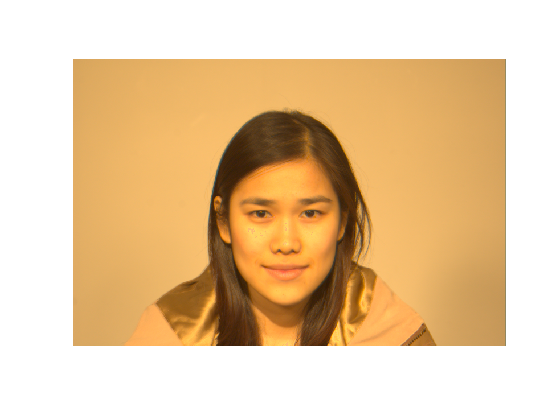

In [12]:
% The original scene was acquired under tungsten light
d = rd.readArtifact(a(1));
scene = sceneFromBasis(d);
sceneShowImage(scene);

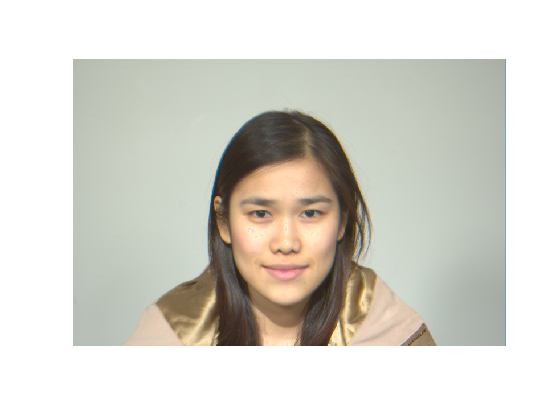

In [13]:
% Because it is spectral, we can re-render it under a daylight
scene = sceneAdjustIlluminant(scene,'D65.mat');
sceneShowImage(scene);

### Scene summary 

A variety of scene types can be created automatically.  The text here is a brief summary.  You can see more examples by typing

```
help sceneCreate
```

or visiting [this web page that includes scenes and how to set the parameters.](http://imageval.com/Scripts/scene/s_sceneExamples.html).
 
 
### Color and luminance charts
 
The default, scene = sceneCreate, is a Macbeth color checker illuminated by a D65 light source with a mean luminance of 100 cd/m2.  The scene is  described only a small number of spatial 64x96 (row,col).  This can be changed using the patchSize argument (default - 16 pixels).  The wavelength  400:10:700 samples, making it efficient to use for experiments.
 
    Example:
     scene = sceneCreate('macbeth',32);
 
     patchSize = 8;
     spectrum.wave = (380:4:1068)';
     scene = sceneCreate('macbethEE_IR',patchSize,spectrum);
 
       {'macbethd65'}  - Create a Macbeth D65 image.  Optional
          parameter of patch size (default = 16 pixels).
       {'macbethd50'}         - D50 illuminant
       {'macbethillc'}        - Illuminant C
       {'macbethfluorescent'} - Fluorescent illuminant
       {'macbethtungsten'}    - Tungsten illuminant
       {'macbethEE_IR'}       - Equal energy extends out to the IR
 
You can use sceneAdjustIlluminant() to change the scene illuminant's Spectral Power Distrtion.
 
### Reflectance samples
 
    {'reflectance chart'}       - Specify random reflectance samples from
                                  database. There is always a gray strip at
                                  the right.   Uses sceneReflectanceChart
 
### Narrowband lights
    
     scene = sceneCreate('uniform monochromatic',wave,sz);
 
### Spatial test patterns
 
       {'rings rays'}            - Resolution pattern
       {'harmonic'}              - Harmonics (can be sums of harmonics)
       {'sweep frequency'}       - Increasing frequency to the right,
                increasing contrast upward
       {'line d65'}              - Line with D65 energy spectrum
       {'line ee'}               - Line with equal energy spectrum
       {'bar ee'}                - Vertical bar, equal energy
       {'point array'}           - Point array
       {'gridlines'}             - Grid lines
       {'checkerboard'}          - Checkerboard with equal photon spectrum
       {'frequency orientation'} - Demosaicking test pattern, equal photon spectrum
       {'slanted edge'} - Used for ISO spatial resolution, equal photon spectrum
       {'moire orient'} - Circular Moire pattern
       {'zone plate'}   - Circular zone plot, equal photon spectrum
       {'radial lines'} - Radial lines used to test printers and displays
 
       sceneCreate('slanted edge',imageSize,edgeSlope);
       sceneCreate('checkerboard',pixelsPerCheck,numberOfChecks)
       sceneCreate('grid lines',imageSize,pixelsBetweenLines);
       sceneCreate('point array',imageSize,pixelsBetweenPoints);
       sceneCreate('moire orient',imageSize,edgeSlope);
       sceneCreate('vernier',imageSize,lineWidth,pixelOffset);
       sceneCreate('radial lines', imageSize);
 
###  Text

Studying reading?

    {'letter', 'font}- Scene created for certain character and display

For displays that have a psf, and a subset of all the possible letter
sizes and font combinations, we can create a scene.

       letter = 'g'; fontSize = 18; 
       display ='LCD-Apple'; fontName = 'Georgia';
       scene = sceneCreate('letter', 'g', fontSize, fontName, display);
 
### Simple test patterns
 
       {'linearIntensityRamp'}  -
       {'uniformEqualEnergy'}   - Equal energy
       {'uniformEqualPhoton'}   - Equal photon density
       {'uniform bb'}           - Blackbody, uniform
       {'whitenoise'}           - Noise pattern for testing
 
The uniform patterns are small by default (32,32).  If you would like them at a higher density (not much point), you can use
 
         sceneCreate('uniform D65',256)
         sceneCreate('uniform bb',128,6500)    - 6500 deg
 
where 256 is the image size in pixels.
 
###  Scenes from general images (jpg, tiff)
  
We also create scenes using data in image files.  It is also possible to simply read a tiff or jpeg file and create a scene structure.  These image-based scenes created by **sceneFromFile**.  See the comments there for more information.
 